In [8]:
# Create Array
import numpy as np
width=8
height=4
random_array = np.random.randint(0,7, size=(4,8))
print(random_array)

[[6 3 6 2 2 2 4 1]
 [4 6 4 2 5 0 0 1]
 [0 6 1 0 4 3 6 2]
 [3 6 3 2 1 4 1 2]]


In [9]:
# Create Normal Vector
flat_array = random_array.flatten()
magnitude = np.linalg.norm(flat_array)
normalized_array = flat_array / magnitude
normal_vector = normalized_array[:32]
print(normal_vector)

[0.30382181 0.15191091 0.30382181 0.10127394 0.10127394 0.10127394
 0.20254787 0.05063697 0.20254787 0.30382181 0.20254787 0.10127394
 0.25318484 0.         0.         0.05063697 0.         0.30382181
 0.05063697 0.         0.20254787 0.15191091 0.30382181 0.10127394
 0.15191091 0.30382181 0.15191091 0.10127394 0.05063697 0.20254787
 0.05063697 0.10127394]


In [11]:
# Import
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

Statevector after amplitude encoding:
Statevector([0.30382181+0.j, 0.15191091+0.j, 0.30382181+0.j,
             0.10127394+0.j, 0.10127394+0.j, 0.10127394+0.j,
             0.20254787+0.j, 0.05063697+0.j, 0.20254787+0.j,
             0.30382181+0.j, 0.20254787+0.j, 0.10127394+0.j,
             0.25318484+0.j, 0.        +0.j, 0.        +0.j,
             0.05063697+0.j, 0.        +0.j, 0.30382181+0.j,
             0.05063697+0.j, 0.        +0.j, 0.20254787+0.j,
             0.15191091+0.j, 0.30382181+0.j, 0.10127394+0.j,
             0.15191091+0.j, 0.30382181+0.j, 0.15191091+0.j,
             0.10127394+0.j, 0.05063697+0.j, 0.20254787+0.j,
             0.05063697+0.j, 0.10127394+0.j],
            dims=(2, 2, 2, 2, 2))


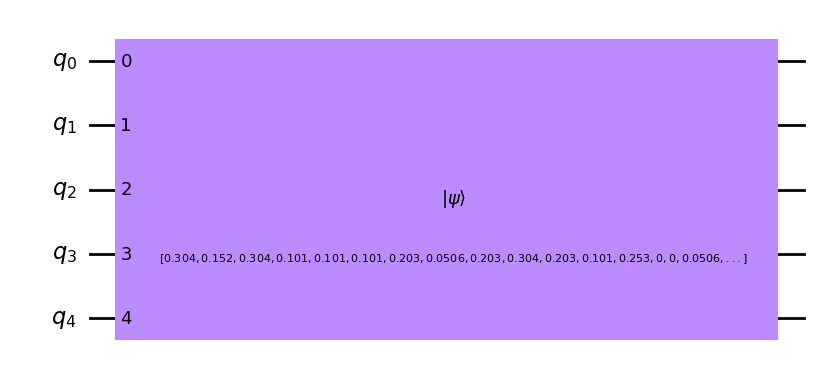

In [17]:
# Encoding
num_qubits = int(np.log2(len(normal_vector)))
qc = QuantumCircuit(num_qubits)
qc.initialize(normal_vector, qc.qubits)
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# Draw
print("Statevector after amplitude encoding:")
print(statevector)
qc.draw("mpl", cregbundle=False)